# Self Organizing Map

## Install MiniSom Package

In [9]:
!pip install MiniSom #for implementing the SOMs

  Created wheel for MiniSom: filename=MiniSom-2.2.6-py3-none-any.whl size=8530 sha256=dd7065f2cb988c3b40c6ece10240c7c27d39f8788473eadaf9d20979aef15a77
  Stored in directory: c:\users\nasa\appdata\local\pip\cache\wheels\2a\0e\9e\6500009288a2a348561306008bd82dad4b47d7766966d92bac
Successfully built MiniSom


### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
df = pd.read_csv('Credit_Card_Applications.csv')

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [6]:
x

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [8]:
y #But remember that this is not a supervised learning problem. We just use "y" to distinguish between costumers whom their application was approved/not approved.

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

## Feature Scaling


In [10]:
#we do a Normalization here:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)

In [11]:
x

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

## Training the SOM


In [38]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5) #x, y: are the size of the grid map. here we choose a 10x10 grid. 
#input_len: the number of features in "x" = 15. 
#sigma: the radious of the neighborhoods in the grid.
#learning_rate: the more the lr, the faster the algorithm converges.
#decay_function: to further improve the algorithm's convergence. But here we don't use it.

In [39]:
#initializing the weights:

som.random_weights_init(x)

In [40]:
#train the model on x:

som.train_random(x, num_iteration = 100) #num_iteration = 100: the number of iteration

## Visualizing the results


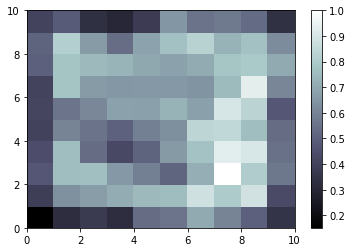

In [41]:
#MID = the mean of the Euclidean distances for a node and its neighboring nodes. So the higher the MID, the more it is an outlier. i.e. fraud. i.e. a winning node.
#We show the winning node in color white. So that the larger the MID, the colse to white its color is.

from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T) #distance_map(): returns the distances between nodes in a matrix.
colorbar() #shows what each color corresponds to. (The highest MID = white = frauds!)

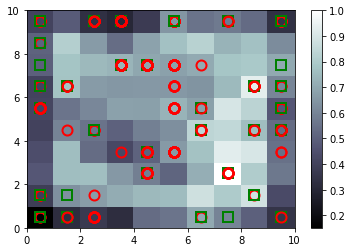

In [45]:
#MID = the mean of the Euclidean distances for a node and its neighboring nodes. So the higher the MID, the more it is an outlier. i.e. fraud. i.e. a winning node.
#We show the winning node in color white. So that the larger the MID, the colse to white its color is.

from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T) #distance_map(): returns the distances between nodes in a matrix.
colorbar() #shows what each color corresponds to. (The highest MID = white = frauds!)

#...........................................................................................................#


#adding some markers:

markers = ['o', 's'] #'o':circle  #'s':square
colors = ['r', 'g'] #'r':red circle(= costumer Not approved)  #'g':green square(costumer approved)

for i, x_vector in enumerate(x): #for each costumer and its whole row:
    w = som.winner(x_vector) #find the winning nodes for the costumers
    plot(w[0] + 0.5, #w[0], w[1]: x and y cordinates
         w[1] + 0.5, #w[0] + 0.5: put the marker at the center of the square of the winning node
         markers[y[i]],  #Now is where we use "y" we fisrt defined!!
         markeredgecolor = colors[y[i]], #only color the edges of the squares
         markerfacecolor = 'None', #do not color the inner side of the quares
         markersize = 10,
         markeredgewidth = 2)
show() #Therefore, as we see bellow, the costumers in the white squared sections (there are both approved and not-approved costumers in those sections) are highly fraudulent!

## Finding the Frauds

In [46]:
#So Let's catch the bad guys if we can! :D So this is done by using a dictionary and a method in Minisom libraryn, whcich contains all the mapping so far for the winning node:

mappings = som.win_map(x) #IMP! data = x: only the data that our SOM model was trained on. So NOT the whole df!

In [48]:
print(mappings) #This matrix is more nicely shown in Spyder IDE. This is basically the winning nodes, i.e. the fradulent costumers.
#But remember that all the data in this matrix was scaled. So in order to get their originl value we have to do an inverse scale.

defaultdict(<class 'list'>, {(3, 7): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.13505039, 1.        , 0.67413534, 0.09678571, 0.5       ,
       0.53846154, 0.375     , 0.08473684, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.16      , 0.        ]), array([0.12811888, 1.        , 0.2793985 , 0.125     , 0.5       ,
       0.23076923, 0.375     , 0.01754386, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.116     , 0.        ]), array([0.30921519, 1.        , 0.44240602, 0.17857143, 0.5       ,
       0.15384615, 0.5       , 0.07894737, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.0705    , 0.        ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
       0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
       0.       

In [54]:
frauds = np.concatenate((mappings[(7, 2)] , mappings[(8, 6)]), axis = 0) #So according to the above picture, the white section's (fraudulent costumer's) coordinates are: "(7, 2), (8, 6)"

In [55]:
frauds

array([[6.17573450e-01, 0.00000000e+00, 3.22105263e-01, 1.33928571e-01,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 8.95522388e-02, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 2.00000000e-03],
       [5.84745865e-01, 0.00000000e+00, 1.39097744e-01, 6.55357143e-02,
        5.00000000e-01, 3.07692308e-01, 2.50000000e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
        5.00000000e-01, 1.00000000e-01, 5.30000000e-04],
       [7.84926861e-01, 0.00000000e+00, 3.50375940e-02, 1.19642857e-02,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
        5.00000000e-01, 8.00000000e-02, 1.26000000e-03],
       [8.22015064e-01, 0.00000000e+00, 3.99699248e-01, 2.90178571e-01,
        0.00000000e+00, 2.30769231e-01, 3.75000000e-01, 5.78947368e-03,
        0.00000000e+00, 1.00000000e+0

In [56]:
#rescaling to the original value:

frauds = sc.inverse_transform(frauds)

## Printing the Fraud Clients

In [60]:
frauds

array([[1.5719940e+07, 0.0000000e+00, 3.5170000e+01, 3.7500000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 2.0100000e+02],
       [1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 5.4000000e+01],
       [1.5761733e+07, 0.0000000e+00, 1.6080000e+01, 3.3500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.2700000e+02],
       [1.5770995e+07, 0.0000000e+00, 4.0330000e+01, 8.1250000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [61]:
frauds[0] #the first fraudulent client

array([1.571994e+07, 0.000000e+00, 3.517000e+01, 3.750000e+00,
       2.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 6.000000e+00, 0.000000e+00,
       2.000000e+00, 0.000000e+00, 2.010000e+02])

In [62]:
#So actually, "ID = 15719940" is a fraudulent costumer. The other elements in "frauds[0]" are "A1 to A14" in "x".
#Thus all the Fraud client IDs are:

frauds[:, 0]

array([15719940., 15711742., 15761733., 15770995., 15699963., 15736399.,
       15766734., 15667934., 15667588., 15796813., 15731166., 15649379.,
       15729771., 15609823., 15701687., 15721507., 15711249., 15658504.,
       15792107., 15700046., 15769356., 15813192.])

In [68]:
df[df['CustomerID'] == 15719940] #DONE!!

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
81,15719940,0,35.17,3.75,2,1,1,0.0,0,1,6,0,2,0,201,0
